In [1]:
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
# 1 ---- Sentiment and News ----
# 1a ---- Stocktwits ----

In [ ]:
# 1b ---- Twitter (X) ----

In [ ]:
# 1c ---- IEX Cloud (deprecating in August 2024) ----

In [ ]:
# 1x ---- Transform over the news, maybe create own sentiment score
# might want to run this actually first on overall market and stuff but then specifically on stocks, not sure yet 

In [ ]:
# 2 ---- Foreign Exchanges and Foreign News ----

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed

Combined Data for the Last 14 Trading Days:


,Date,S&P 500,NASDAQ,Dow Jones
0,2024-06-18,NaN,NaN,NaN
1,2024-06-20,-0.252593,-0.787363,0.772250
2,2024-06-21,-0.156213,-0.181871,0.039776
3,2024-06-24,-0.306517,-1.088446,0.666362
4,2024-06-25,0.393359,1.262115,-0.758796
5,2024-06-26,0.157243,0.493913,0.039989
6,2024-06-27,0.090732,0.300584,0.092665
7,2024-06-28,-0.408365,-0.705988,-0.115410
8,2024-07-01,0.267556,0.827296,0.129503
9,2024-07-02,0.619532,0.835933,0.414435


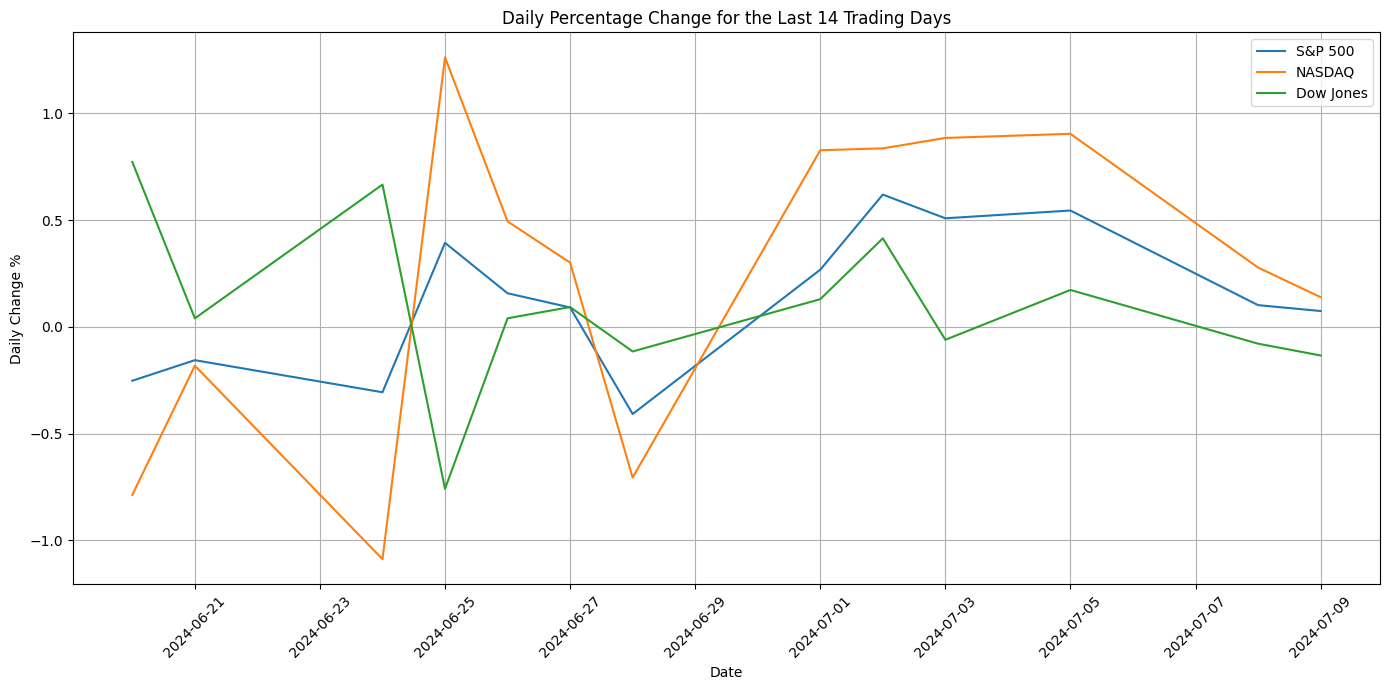

In [5]:
# 3 ---- Major Indicies Performance ----

# Define the indices and their corresponding Yahoo Finance tickers
indices = {
    'S&P 500': '^GSPC',
    'NASDAQ': '^IXIC',
    'Dow Jones': '^DJI'
}

# Function to fetch data for a given ticker and add index name
def fetch_index_data(index_name, ticker, period):
    data = yf.download(ticker, period=period)
    data['Index'] = index_name
    data['Daily Change %'] = data['Close'].pct_change() * 100
    return data

# Fetch data for the last 14 trading days
period = '14d'
indices_data = {index: fetch_index_data(index, ticker, period) for index, ticker in indices.items()}

# Create a combined dataframe for the last 14 trading days
major_index_df = pd.DataFrame()

for index, data in indices_data.items():
    data = data[['Daily Change %']].rename(columns={'Daily Change %': index})
    major_index_df = pd.concat([major_index_df, data], axis=1)

# Reset the index to ensure the Date column is in the dataframe
major_index_df.reset_index(inplace=True)

# Display the combined dataframe
print("Combined Data for the Last 14 Trading Days:")
display(major_index_df)

# Plot the data
plt.figure(figsize=(14, 7))
for index in indices.keys():
    plt.plot(major_index_df['Date'],major_index_df[index], label=index)
plt.title('Daily Percentage Change for the Last 14 Trading Days')
plt.xlabel('Date')
plt.ylabel('Daily Change %')
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed

Combined Data for the Last 14 Trading Days:


,Date,S&P 500,NASDAQ,Dow Jones,VIX,S&P 500_Historical_Volatility,NASDAQ_Historical_Volatility,Dow Jones_Historical_Volatility
0,2024-06-18,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2024-06-20,-0.252593,-0.787363,0.772250,NaN,NaN,NaN,NaN
2,2024-06-21,-0.156213,-0.181871,0.039776,13.20,NaN,NaN,NaN
3,2024-06-24,-0.306517,-1.088446,0.666362,13.33,NaN,NaN,NaN
4,2024-06-25,0.393359,1.262115,-0.758796,12.84,NaN,NaN,NaN
5,2024-06-26,0.157243,0.493913,0.039989,12.55,NaN,NaN,NaN
6,2024-06-27,0.090732,0.300584,0.092665,12.24,NaN,NaN,NaN
7,2024-06-28,-0.408365,-0.705988,-0.115410,12.44,NaN,NaN,NaN
8,2024-07-01,0.267556,0.827296,0.129503,12.22,NaN,NaN,NaN
9,2024-07-02,0.619532,0.835933,0.414435,12.03,NaN,NaN,NaN


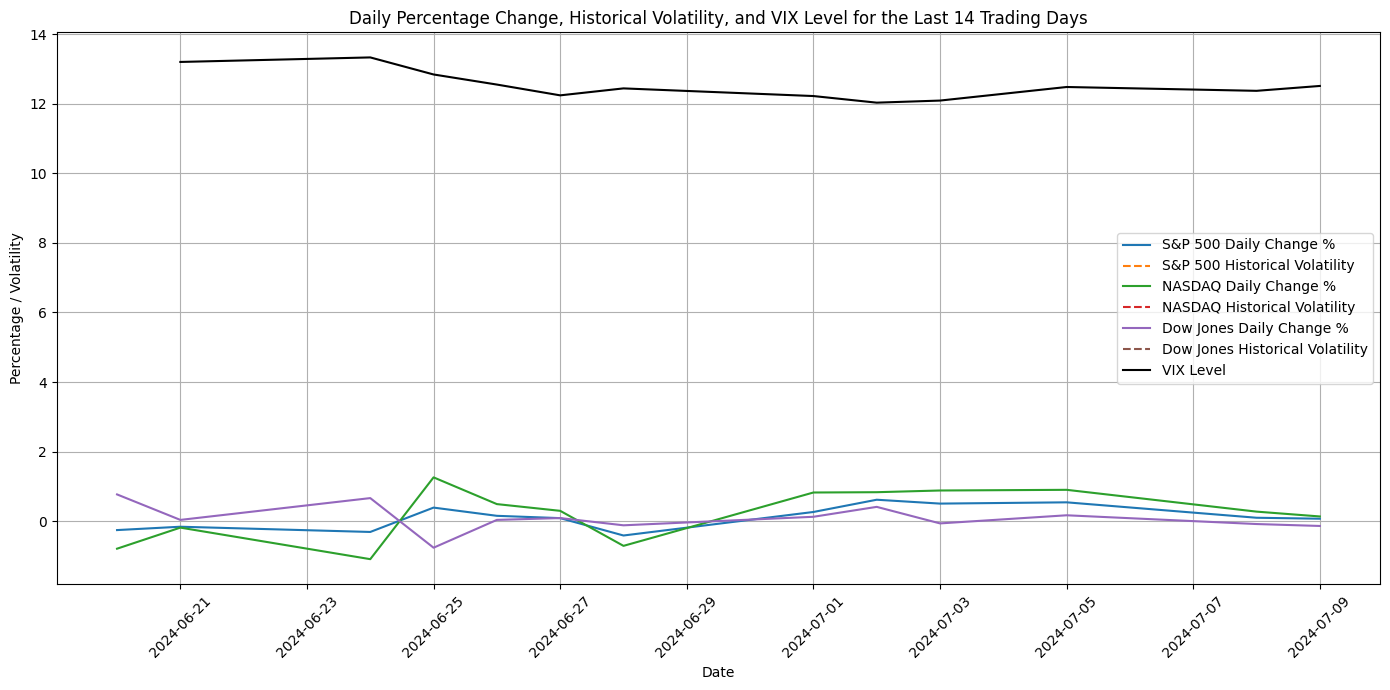

In [7]:
#### 2 ---- Volatility Indicators ----
